# Take code from git

In [1]:
!git clone https://github.com/MayaVB/Applied_DS_Project.git

Cloning into 'Applied_DS_Project'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 135 (delta 45), reused 113 (delta 32), pack-reused 0 (from 0)
Receiving objects: 100% (135/135), 3.43 MiB | 2.01 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [1]:
!ls Applied_DS_Project

data  notebooks  README.md  requirements.txt  src


In [2]:
!ls Applied_DS_Project/src

eval.py  getdata.py  main.py  models.py  preprocess.py	printstatistics.py  __pycache__


# Install requirements

In [4]:
!pip install -r Applied_DS_Project/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
bigframes 1.15.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is incompatible.


## consider for future features

In [5]:
# %pip install yfinance
# %pip install tweepy
# %pip install wbdata pandas
# %pip install xgboost

## Imports

In [3]:
# set working directory:
%cd Applied_DS_Project/src

# imports
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.append('../src')
from eval import plot_feature_importances, plot_auc_roc_curve, perform_cross_validation
from getdata import add_nasdaq_annual_changes, add_economic_indicators
from models import train_xgb_model, train_rf_model, train_svm_model
from models import train_rfv2_model
from models import evaluate_model, predict_model
from printstatistics import print_correlations_Spearman_and_Pearson
from preprocess import load_data, preprocess_data

/content/Applied_DS_Project/src


## Load Data

In [4]:
df = load_data('../data/startup_data.csv')

In [8]:
# # Create label
# df['status_code'] = df['status'].map({'acquired': 1, 'closed': 0})

# print_correlations_Spearman_and_Pearson(df['relationships'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['avg_participants'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundC'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundD'], df['status_code'])

# print_correlations_Spearman_and_Pearson(df['relationships'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['avg_participants'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundC'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundD'], df['status_code'])

# df.drop(columns=['status_code'])

## Preprocess Data

In [5]:
# Add economic indicators
df = add_nasdaq_annual_changes(df)
indicator_code = 'NY.GDP.MKTP.KD.ZG'
df = add_economic_indicators(df, indicator_code)
indicator_code = 'SL.UEM.TOTL.ZS'
df = add_economic_indicators(df, indicator_code)

# Preprocess the data
X, y = preprocess_data(df, useKNNImputer=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Train predict and evaluate models

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:46:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Threshold: 0.7
AUC-ROC: 0.78
Accuracy: 0.75
Balanced Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        57
           1       0.83      0.81      0.82       128

    accuracy                           0.75       185
   macro avg       0.71      0.71      0.71       185
weighted avg       0.75      0.75      0.75       185

Confusion Matrix (Test):
[[ 35  22]
 [ 24 104]]


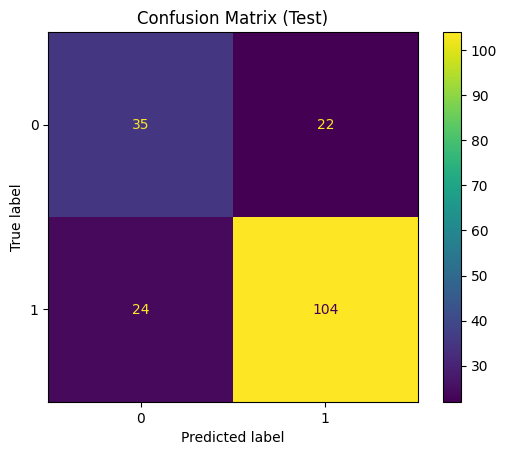

Precision (Test): 0.8254
Recall (Test): 0.8125


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:46:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:46:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:46:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:46:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:46:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Accuracy Scores: [0.83108108 0.80405405 0.77027027 0.78231293 0.68027211]
Mean Cross-Validation Accuracy: 0.77
Cross-Validation Balanced Accuracy Scores: [0.81185973 0.77088258 0.74428684 0.73514653 0.62305854]
Mean Cross-Validation Balanced Accuracy: 0.74
Cross-Validation AUC Scores: [0.89046493 0.84101655 0.79767533 0.78924127 0.6660693 ]
Mean Cross-Validation AUC: 0.8
Cross-Validation Precision Scores: [0.8556701  0.81553398 0.80612245 0.78703704 0.70909091]
Mean Cross-Validation Precision: 0.79
Cross-Validation Recall Scores: [0.88297872 0.89361702 0.84042553 0.90425532 0.83870968]
Mean Cross-Validation Recall: 0.87
Cross-Validation F1 Scores: [0.86910995 0.85279188 0.82291667 0.84158416 0.76847291]
Mean Cross-Validation F1: 0.83
Cross-Validation Kappa Scores: [0.63118022 0.56168301 0.49639712 0.49904153 0.26351135]
Mean Cross-Validation Kappa: 0.49


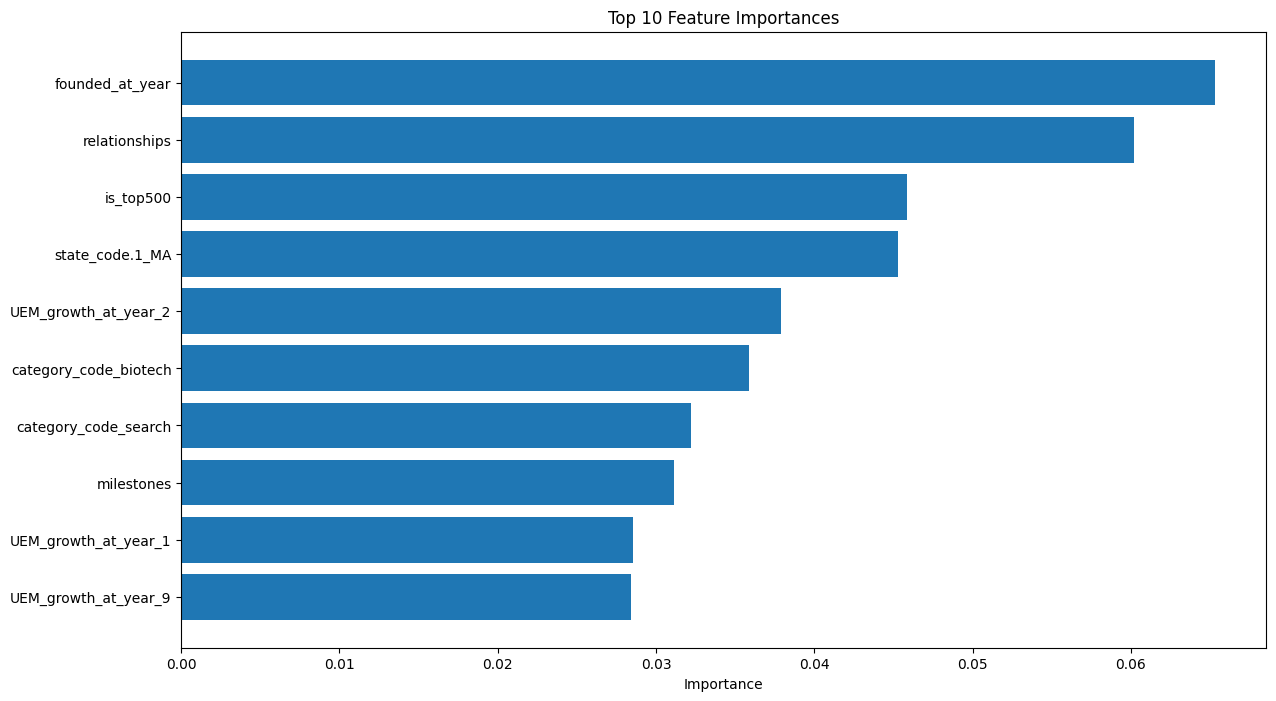

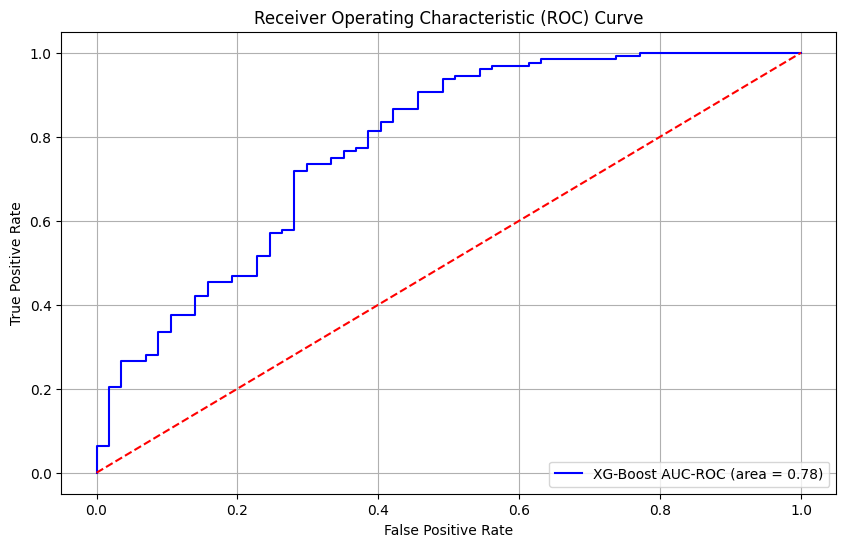

In [6]:
# XG Boost
xgb_clf = train_xgb_model(X_train, y_train)
xgb_pred, xgb_prob = predict_model(xgb_clf, X_test)
evaluate_model(y_test, xgb_pred, xgb_prob, threshold=0.7)
cv_results_xgb = perform_cross_validation(xgb_clf, X_train, y_train, n_splits=5, random_state=42)

plot_feature_importances(xgb_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, xgb_prob, model_name='XG-Boost')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Threshold: 0.7
AUC-ROC: 0.79
Accuracy: 0.74
Balanced Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.61      0.59        57
           1       0.82      0.79      0.80       128

    accuracy                           0.74       185
   macro avg       0.69      0.70      0.70       185
weighted avg       0.74      0.74      0.74       185

Confusion Matrix (Test):
[[ 35  22]
 [ 27 101]]


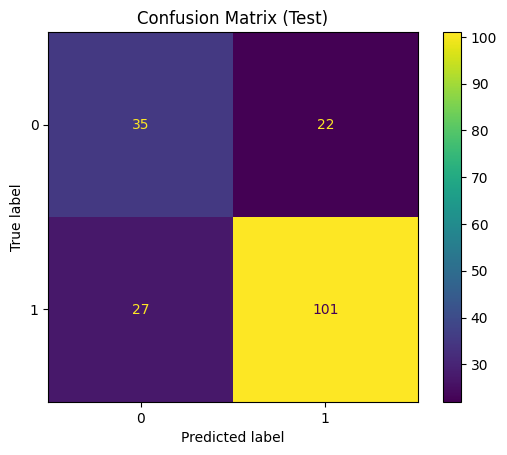

Precision (Test): 0.8211
Recall (Test): 0.7891
Cross-Validation Accuracy Scores: [0.83783784 0.75675676 0.79054054 0.75510204 0.65306122]
Mean Cross-Validation Accuracy: 0.76
Cross-Validation Balanced Accuracy Scores: [0.83293932 0.73364854 0.77206462 0.73855881 0.61320191]
Mean Cross-Validation Balanced Accuracy: 0.74
Cross-Validation AUC Scores: [0.88297872 0.84259259 0.8534279  0.77037334 0.66806053]
Mean Cross-Validation AUC: 0.8
Cross-Validation Precision Scores: [0.88888889 0.80208333 0.83157895 0.81521739 0.71      ]
Mean Cross-Validation Precision: 0.81
Cross-Validation Recall Scores: [0.85106383 0.81914894 0.84042553 0.79787234 0.76344086]
Mean Cross-Validation Recall: 0.81
Cross-Validation F1 Scores: [0.86956522 0.81052632 0.83597884 0.80645161 0.7357513 ]
Mean Cross-Validation F1: 0.81
Cross-Validation Kappa Scores: [0.65554694 0.47100874 0.54628165 0.47322317 0.23272951]
Mean Cross-Validation Kappa: 0.48


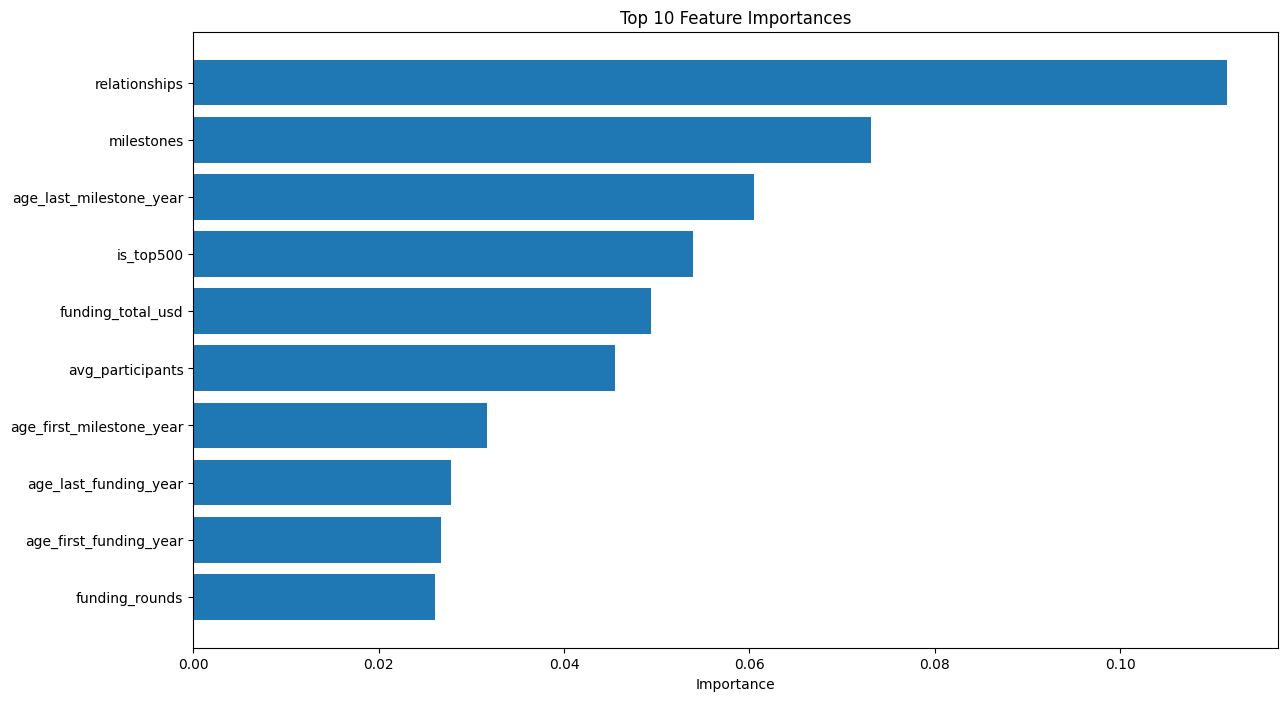

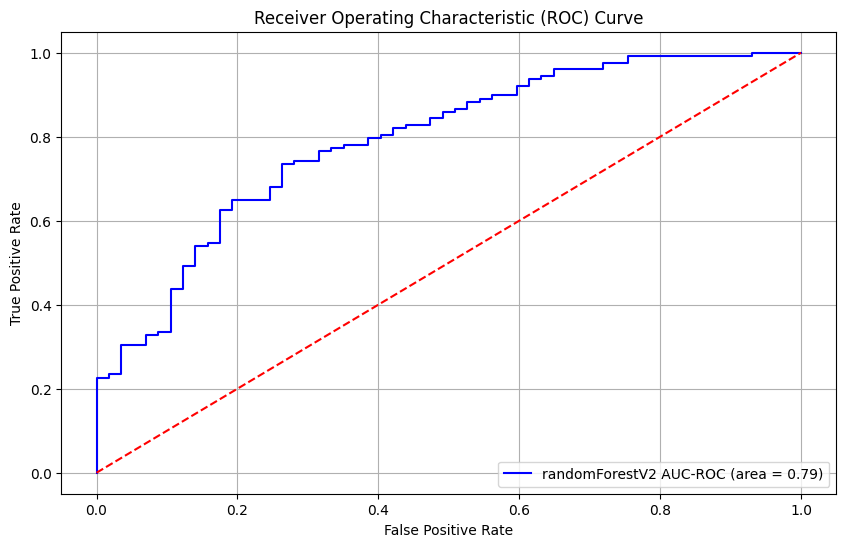

In [7]:
# Fandom Forest Ver2
rfv2_clf = train_rfv2_model(X_train, y_train)
rfv2_pred, rfv2_prob = predict_model(rfv2_clf, X_test)
evaluate_model(y_test, rfv2_pred, rfv2_prob)
cv_results_rfv2 = perform_cross_validation(rfv2_clf, X_train, y_train, n_splits=5, random_state=42)

plot_feature_importances(rfv2_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, rfv2_prob, model_name='randomForestV2')

Threshold: 0.7
AUC-ROC: 0.79
Accuracy: 0.77
Balanced Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.53      0.58        57
           1       0.81      0.88      0.84       128

    accuracy                           0.77       185
   macro avg       0.73      0.70      0.71       185
weighted avg       0.76      0.77      0.76       185

Confusion Matrix (Test):
[[ 30  27]
 [ 16 112]]


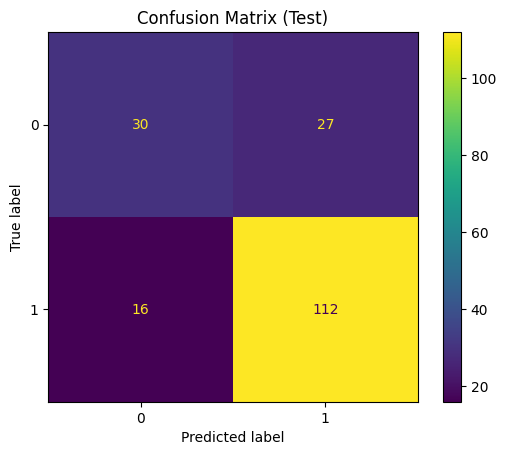

Precision (Test): 0.8058
Recall (Test): 0.875
Cross-Validation Accuracy Scores: [0.83108108 0.7972973  0.79054054 0.74829932 0.67346939]
Mean Cross-Validation Accuracy: 0.77
Cross-Validation Balanced Accuracy Scores: [0.78821907 0.74192277 0.73266351 0.70443597 0.61379928]
Mean Cross-Validation Balanced Accuracy: 0.72
Cross-Validation AUC Scores: [0.88150118 0.82348306 0.84081954 0.77709755 0.6590004 ]
Mean Cross-Validation AUC: 0.8
Cross-Validation Precision Scores: [0.81651376 0.78070175 0.77391304 0.77142857 0.7027027 ]
Mean Cross-Validation Precision: 0.77
Cross-Validation Recall Scores: [0.94680851 0.94680851 0.94680851 0.86170213 0.83870968]
Mean Cross-Validation Recall: 0.91
Cross-Validation F1 Scores: [0.87684729 0.85576923 0.85167464 0.81407035 0.76470588]
Mean Cross-Validation F1: 0.83
Cross-Validation Kappa Scores: [0.61264657 0.52523524 0.50730241 0.42825607 0.24470135]
Mean Cross-Validation Kappa: 0.46


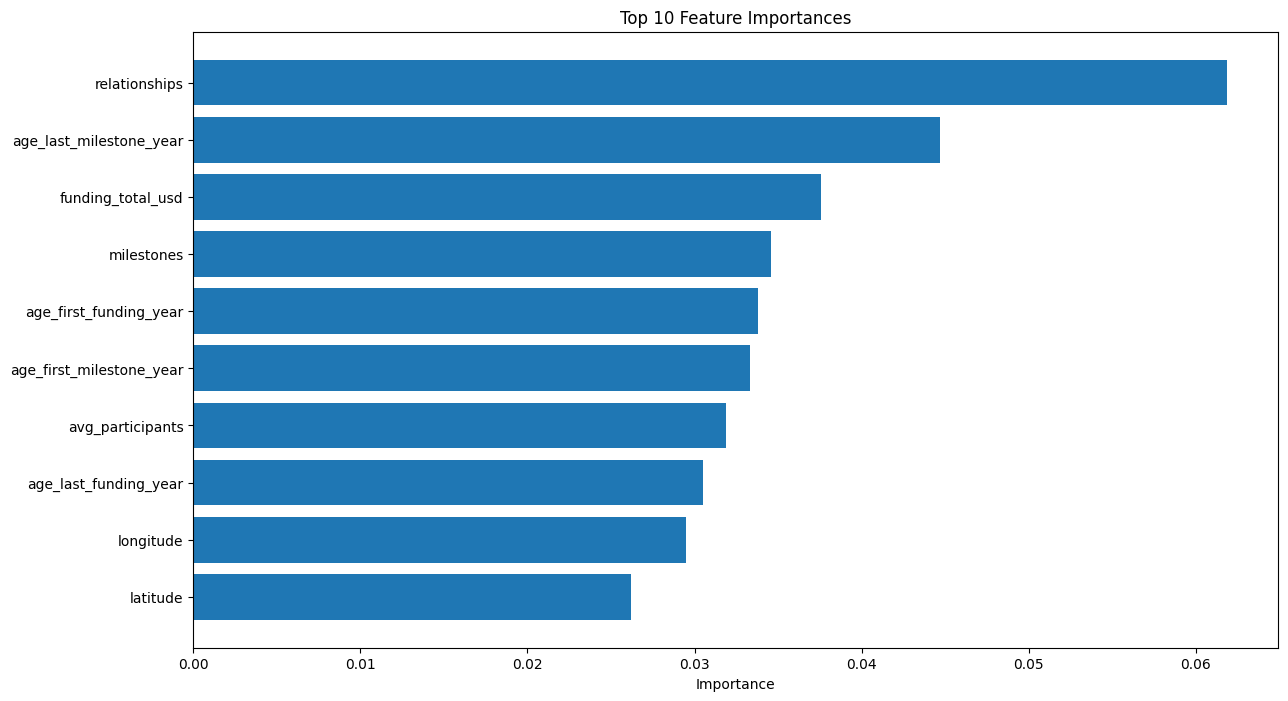

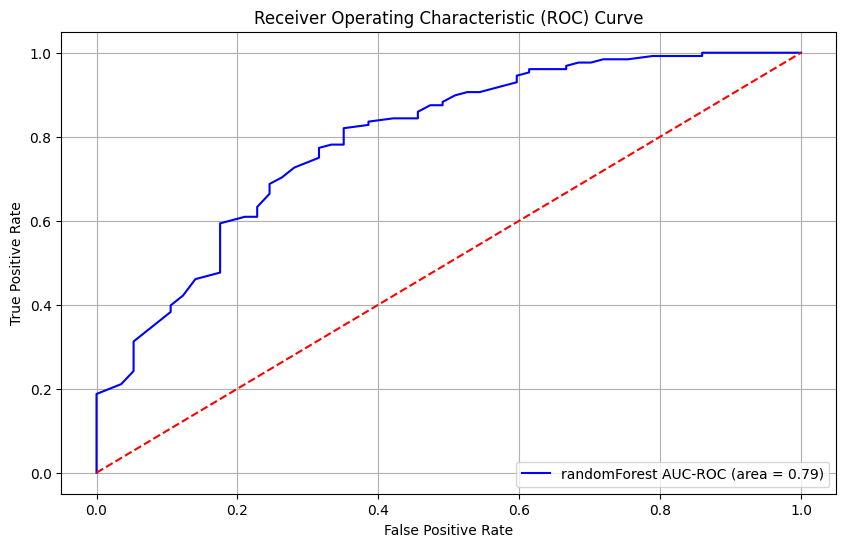

In [8]:
# Fandom Forest
rf_clf = train_rf_model(X_train, y_train)
rf_pred, rf_prob = predict_model(rf_clf, X_test)
evaluate_model(y_test, rf_pred, rf_prob)
cv_results_rf = perform_cross_validation(rf_clf, X_train, y_train, n_splits=5, random_state=42)

plot_feature_importances(rf_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, rf_prob, model_name='randomForest')

Threshold: 0.7
AUC-ROC: 0.76
Accuracy: 0.74
Balanced Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.49      0.53        57
           1       0.79      0.84      0.82       128

    accuracy                           0.74       185
   macro avg       0.69      0.67      0.67       185
weighted avg       0.73      0.74      0.73       185

Confusion Matrix (Test):
[[ 28  29]
 [ 20 108]]


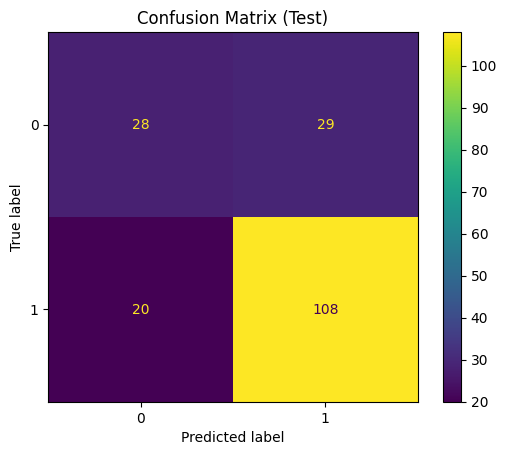

Precision (Test): 0.7883
Recall (Test): 0.8438
Cross-Validation Accuracy Scores: [0.81081081 0.76351351 0.79054054 0.75510204 0.63265306]
Mean Cross-Validation Accuracy: 0.75
Cross-Validation Balanced Accuracy Scores: [0.77226162 0.71532703 0.74054374 0.70152549 0.58154122]
Mean Cross-Validation Balanced Accuracy: 0.7
Cross-Validation AUC Scores: [0.84239559 0.81717888 0.83865248 0.78743477 0.6385902 ]
Mean Cross-Validation AUC: 0.78
Cross-Validation Precision Scores: [0.81132075 0.7706422  0.78378378 0.76363636 0.68571429]
Mean Cross-Validation Precision: 0.76
Cross-Validation Recall Scores: [0.91489362 0.89361702 0.92553191 0.89361702 0.77419355]
Mean Cross-Validation Recall: 0.88
Cross-Validation F1 Scores: [0.86       0.82758621 0.84878049 0.82352941 0.72727273]
Mean Cross-Validation F1: 0.82
Cross-Validation Kappa Scores: [0.57154673 0.45770519 0.515625   0.43145681 0.17105263]
Mean Cross-Validation Kappa: 0.43


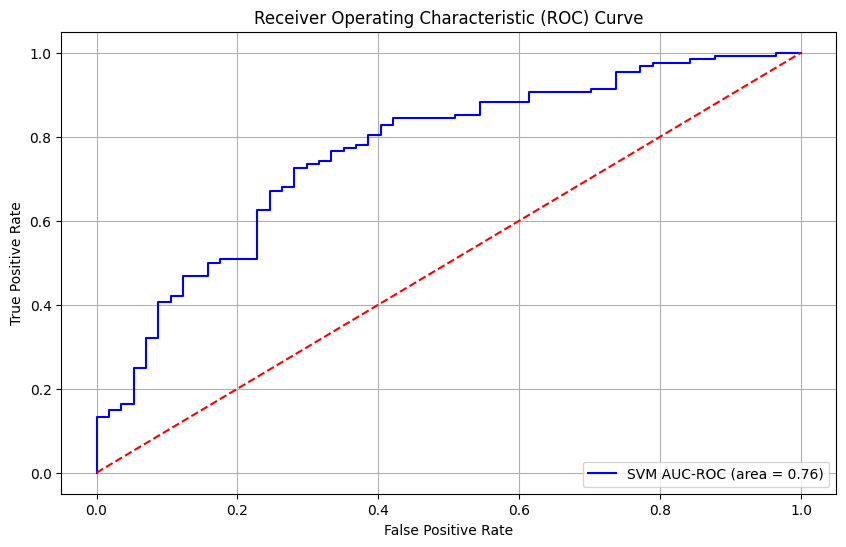

In [9]:
# SVM
svm_clf = train_svm_model(X_train, y_train)
svm_pred, svm_prob = predict_model(svm_clf, X_test)
evaluate_model(y_test, svm_pred, svm_prob)
cv_results_SVM = perform_cross_validation(svm_clf, X_train, y_train, n_splits=5, random_state=42)

plot_auc_roc_curve(y_test, svm_prob, model_name='SVM')